## Student Project

In this notebook the main results of the following paper are replicated: M. Brückner and A. Ciccone (2011) "Rain and the Democratic Window of Opportunity", *Econometrica*, Vol. 79, pp. 923-947. The paper can be found [here]( https://doi.org/10.3982/ECTA8183), the respective data are available [here](https://www.econometricsociety.org/content/supplement-rain-and-democratic-window-opportunity-0), while additional data on elections are taken from [here](https://www.idea.int/data-tools/continent-view/Africa/40).

*Accessible in this [classroom](https://github.com/HumanCapitalAnalysis/student-project-maxschae)*.

### Reference Section

[Preface](#preface)

[**Section I:** Story, Data, Illustration and Identification Strategy](#section-i)
    
[**Section II:** Estimation Framework Part 1](#section-ii)

[**Section III:** Critical Assessment, Context, LATE and ACR](#section-iii)

[**Section IV:** Estimation Framework Part 2 - the case with elections](#section-iv)

[**Section V:** Concluding Remarks](#section-v)

[Appendix](#appendix)

<br>

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

from auxiliary import *

%matplotlib inline
sns.set()

<a id='preface'></a>
### Preface

Brückner and Ciccone (2011) investigate how democratic change is triggered. This question has been posed by others before, and the literature investigating the relationship between income and democratization exhibits a key distinction: the causal effect emerges from either persistent and non-persistent shocks to income. Research on persistent changes in income tend to find a positive relationship between income and institutional development (e.g. Barro (1999) or Boix and Stokes (2003)). See also Brückner et al. (2012) for a study investigating the effect of persistent income shocks on institutional scores. They employ an instrumental variable approach and find that the 2SLS estimator yields a positive effect of persistent positive income shocks on institutional scores. 

The paper to be replicated in this notebook differs to other literature as it focuses on the effect of non-persistent shocks on income, and the authors contribute to the strain of literature arguing that transitory economic downswings can provoke leaps for democracy (as do e.g. Lipset (1959) or Haggard and Kaufman (1995)). For instance, Lipset (1959) claims that during recessions the legitimacy of authorian regimes is threatened, perhaps because people attest inability to the ruling government. However, Acemoglu and Robinson (2001) argue that democratic change may be triggered even if income shocks are known to be exogenous and temporary. Conceptually, Brückner and Ciccone (2011) are close to the theory of political transition developed by Acemoglu and Robinson (2001) where the latter argue that in times of recession the opportunity cost to contest power is temporarily reduced. Accordingly, autocratic regimes respond with improved democratic institutions when citizens repel policies which can be reversed once the opportunity cost of contesting power revisits non-recession levels. 

Brückner and Ciccone (2011) find that non-persistent negative shocks to income raise institutional scores in sub-Saharan African countries in the following year $-$ countries become less autocratic and more democratic. To overcome endogeneity and reverse causality issues an instrumental variable approach is taken, where rainfall serves as an instrument for income. The main result yields that in response to a temporary negative income shock of 1 percent the combined institutional score improved by 0.9 percentage points while the probability of a transition to democracy increases by 1.3 percentage points.

While the main results of the paper will be replicated, additional work focuses around 

* visualisation of the underlying story, 
* the interpretation of results in light of the expositions on the *Local Average Treatment Effect* and *Average Causal Response*, and 
* an extension of the not-much discussed mechanism that relates temporary income shocks to improvements in institutional scores. For that, the role of presidential and parliamentary elections is investigated.

The notebook is organized in the following fashion: section I introduces and describes the data and the identification strategy. The estimation framework building on the previously discussed identification strategy and main results thereof are presented in section II. To emphasize *who* is driving the recovered treatment effects and for whom those are informative, section III exhibits a discussion of the paper's results in light of the expositions on the *Local Average Treatment Effect* and *Average Causal Response*. In Section IV the research design is slightly adjusted to investigate the role of elections within the mechanism relating the treatment and the outcome. Concluding remarks are to be found in Section V.

<hr />

<a id='section-i'></a>
## Section I

### I.a Story

Brückner and Ciccone claim that temporary negative shocks to income cause political institutions in sub-Saharan Africa to become more democratic. Accordingly, negative income shocks decrease the opportunity cost of contesting political power, and to retain stability and command the ruling regime will employ more democratic institutions. The opportunity cost of protesting is inevitably unobservable but is claimed to covary with income. Since income per capita and institutions are likely to have unobserved common causes an instrumental variable approach is taken to isolate the variation in income that is exogenous. Further, many (e.g. Acemoglu et al. (2001), Barro (1999), or Acemoglu et al. (2002)) study the effect of institutions on income per capita. Despite much of this literature focuses on the long-run effects of institutions on income and Brückner and Ciccone investigate the effect of temporary income shocks on institutional outcomes there is still concern for reverse causality which would bias estimators of the causal effect. The instrument is rainfall which is assumed to cause variation in income per capita ($\rightarrow$ IV is relevant), whereas is not correlated with institutional scores (exogeneity assumption) and its only effect on institutions is through income (exclusive restriction assumption). Rainfall affects GDP per capita by increasing agricultural production, such that droughts will have a negative impact on GDP per capita. It is ruled out that droughts lead to an economic upswing (monotonicity assumption).

### I.b  Data

Panel data: 41 sub-Saharan African countries between 1981 to 2004 (unbalanced) $-$ 955 observations

* Institutional scores available from the Polity IV Project (Center for Global Policy, George Mason University)

* Rainfall stems from the National Aeronautics and Space Administration (NASA) Global Precipitation Climatology Project (GPCP)

* GDP per capita data come from the Penn World Table Version 6.2 (Center for International Comparisons of Production, Income and Prices, University of Pennsylvania)

* Agricultural GDP share are reported in World Development Indicators (World Bank, online database (2009))

* Election data collected from IDEA (International Institute for Democracy and Electoral Assistance (2019))

In [2]:
df = get_panel_dataset()

#### Description of relevant variables

*Outcome Y*
* $exconst$ <br>
The executive constraint concept score ranges from -5 to 5 and larger values indicate a greater extent to which constraints are put on the decisionmaking abilities of chief executives $-$ being a single or many individuals. Institutionalized constraints can be an independent judiciary, the military if powerful, or powerful advisors. Taken from the Polity IV database.

* $exrec$ <br>
The executive recruitment concept score taken from the Polity IV database is in [-7, 7] where larger values refer to a more institutionalized and regulated procedure for transferring chief executive power.

* $polcomp$ <br>
Political competition is measured by the extent of equal opportunities for subordinates to become superordinates within and across political parties. It ranges from -9 to 9 and stems from the Polity IV database. A larger value indicates more equal chances to attain power and greater competition.

* $polity2$ <br>
The revised and combined polity score comes from the Polity IV database, and incorporates the three preceding measures. It ranges from -10 to 10, where values between -10 and -6, -5 and 5, and 6 to 10 are called to autocracies, anocracies and democracies, respectively. 

For more details the [Polity IV manual](http://www.systemicpeace.org/inscr/p4manualv2017.pdf) can be consulted. In the estimation framework changes of the outcome variable from $t-1$ to $t$ are considered and denoted by $\Delta$. In general, variable names followed by $l$, $l$*2* refer to a lag of one, two and so on. A leading $l$ indicates log variables.

*Treatment D*
* $gdp$ <br>
The treatment variable is GDP per capita. For convenience and style, income or (negative) income shocks will also be called treatment, however, GDP per capita is meant. In the estimation framework log values are used.

* $recession$ <br>
Indicator variable that equals one if GDP per capita in year is below the country's trend while controlling for shocks affecting all sub-Saharan African countries, and zero otherwise. That is, estimate $(*)$ and evaluate whether $log(GDP_{t,c})$ is below the predicted values of the model, in which $\eta_{t,c}$ constitutes the error.

\begin{align*}
log(GDP_{t, c}) = \alpha_{c}\ + \beta_{c}t\ + \phi_{t}\ + \eta_{t,c}\      (*)
\end{align*}


*Instrument Z*
* $gpcp$ <br>
The instrument is rainfall measured in millimetre of precipitation per year, where one millimeter of rainfall equals one liter of water per square meter.

* $dum$_$rain$_$20$ <br>
Indicator variable that equals one if rainfall in year is below the 20th percentile of the country-specific rainfall distribution, and zero otherwise. Droughts as defined in this notebook refer to this variable.

For the main analysis rainfall and GDP per capita as continuous variables are used for the instrument and the treatment, respectively. This has consequences for the interpretability of the treatment effects which is returned to later. Partly, drought as the instrument and recession as the treatment will be used in estimation and visualization to allow for clearer interpretation.

*Other*
* $agri gdpshare$ <br>
Stemming from the World Development Indicators (2009) the agriculture's GDP share is reported in percentage points at annual granularity.

* $election$ <br>
Indicator variable equal to 1 if parliamentary, presidential elections or both were held in that year and country.

<br>

The descriptive statistics are shown in the table below.

In [3]:
columns = ['exconst', 'exrec', 'polcomp', 'polity2', 'polity_change', 'dum_rain_20', 
           'recession_l2', 'agri_gdpshare', 'gpcp', 'lgpcp_l2', 'gdp', 'lgdp', 'election']
df[columns].describe()

,exconst,exrec,polcomp,polity2,polity_change,dum_rain_20,recession_l2,agri_gdpshare,gpcp,lgpcp_l2,gdp,lgdp,election
count,910.000000,910.000000,910.000000,955.000000,955.000000,955.000000,955.000000,893.000000,955.000000,955.000000,932.000000,932.000000,955.000000
mean,2.910989,4.802198,3.841758,-2.457592,0.249215,0.167539,0.494241,31.154650,972.681458,6.718866,1688.505737,7.072285,0.148691
std,1.767507,1.914681,3.109872,5.668427,2.097390,0.373652,0.500230,15.622894,497.613007,0.640299,1879.546631,0.756854,0.355970
min,1.000000,1.000000,1.000000,-10.000000,-15.000000,0.000000,0.000000,2.200000,96.109329,4.565486,287.024902,5.659569,0.000000
25%,1.000000,3.000000,1.000000,-7.000000,0.000000,0.000000,0.000000,19.250000,552.039703,6.332735,727.876953,6.590132,0.000000
50%,3.000000,4.000000,2.000000,-5.000000,0.000000,0.000000,0.000000,32.619999,944.346802,6.859273,915.803711,6.819801,0.000000
75%,4.000000,7.000000,7.000000,2.000000,0.000000,0.000000,1.000000,41.900002,1336.778015,7.201274,1717.437256,7.448588,0.000000
max,7.000000,8.000000,10.000000,9.000000,15.000000,1.000000,1.000000,69.330002,2587.636963,7.858500,10438.830078,9.253288,1.000000


C:\Users\Max\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Max\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


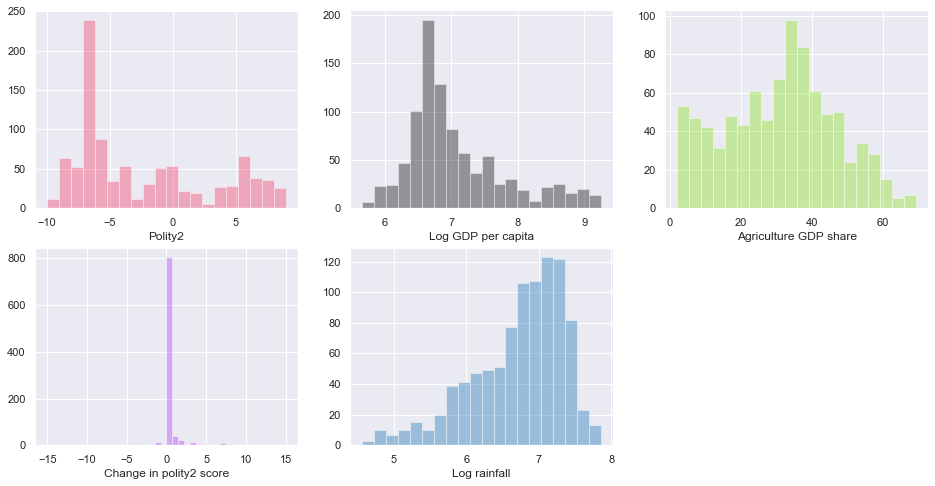

In [4]:
plot_hists()

### I.c Identification Strategy

#### Causal graph

The basic underlying causal graph is depicted in *Graph 1*, where $Y$ denotes the outcome variable, i.e. institutional scores. $D$ refers to the treatment $-$ GDP per capita or recession indicator $-$ and $Z$ is the instrument rainfall levels or drought indicator. Note that the cost of contesting political power is inevitably unobservable and is proxied by GDP per capita. The node $U$ subsumes all confounding variables that are unobserved and reveals that an unblocked backdoor path from the treatment to the outcome exists, motivating the IV approach.


*Graph 1*
<img src="graphs/causal_graph_1.png" height=500 width=500 />

To cope with country-specifics and fixed effects along the time and country dimensions, the authors include time and country fixed effects as well as a country-specifc time trend. Fixed effects are used to make part of the unobservables observable $-$ i.e. unobserved characteristics that stay constant across time (country fixed effects), or analogously across countries (time fixed effects). However, it is not possible to attribute the (estimated) fixed effects to particular constant characteristics but one can only "observe" those as an aggregate. For instance, unobserved time-constant characteristics could be cultural attitude towards innovation, risk-taking and change affecting both income and institutions. However, including fixed effects is not informative about the particular effect of cultural attitude towards risk-taking.

Consult *Graph 2* for a representation of fixed effects in the causal graph framework, and note the potentially still existing unobserved relationship between the treatment and the outcome depicted by the dashed line.


*Graph 2*
<img src="graphs/causal_graph_2.png" height=500 width=500 />

#### Threats to identification

Rainfall is a strong candidate for a natural experiment and an instrument as it cannot be influenced by countries vis-a-vis the country's population working in agriculture and by its effect on the treatment income through agricultural production. However, Rosenzweig and Wolpins offer a discussion of natural *natural experiments* where the importance of critical assessment of (wheather-based) instruments in IV designs is put forward (Rosenzweig and Wolpin (2000)). With that in mind, threats to identification for this setting are presented below.

* Violation of exogeneity assumption <br>
If the instrument has a direct causal effect on the outcome, the researcher cannot recover the causal effect of interest, i.e. *what is the effect of non-persistent income shocks on institutional scores* ($D \rightarrow Y$). In terms of the causal graph, there exists an unblocked backdoor path from the treatment to the outcome through the instrument ($D \leftarrow Z \rightarrow Y$). A direct effect is present when institutions become more democratic following the event of droughts. Then, the instrument would need to be included in the structural equation and one cannot address issues arising from reverse causality and unobservable confounders. Such a case can occur if people connect demands of deepened democratic institutions with the call for democratic governance of water resources, for example. Then droughts would directly cause institutions to become more democratic, given protesters are granted their demands.


*Graph 3*
<img src="graphs/causal_graph_3.png" height=300 width=300 />

* Threats to exclusive restriction <br>
Identification of the causal effect of income shocks on democracy scores is not possible if the instrument has an indirect effect on democracy scores through an unobservable. The resulting backdoor path cannot be blocked and identifying the causal effect fails.  As with the violation of the exogeneity assumption rainfall would need to be included in the structural equation. Such an additional mechanism that cannot be controlled for could be present, if during droughts international organizations and donor countries scale up their aid financing but can connect this to a more constrained executive which increases the combined polity score, i.e. $Y$.


*Graph 4*
<img src="graphs/causal_graph_4.png" height=300 width=300 />

* A note on the interpretation of the causal effect <br>
The identification of the causal effect of negative transitory income shocks on improvements of institutional scores is threatened if negative rainfall shocks affect polity scores by decreasing citizens cost of contesting power not only through income but through other channels, too. The authors mention two potential channels. First, if road floodings vanish in aftermath of a drought, cost of transport and coordination of political protest would decrease. Second, Cekan (1993) finds evidence that young men are more likely to be sent to urban areas in times of drought which may decrease coordination cost of contesting power. In these cases, it is still possible to assess the impact of rainfall shocks on polity scores but the interpretation of the causal effect of interest does not withstand. That is, it cannot be argued that improvements in polity scores are due to negative income shocks.

* Monotonicty assumption not satisfied <br>
A country recovering from a severe flooding that had substantial negative effects on agricultural produce and income per capita may wittness an increase in incomes when the period of floodings is succeeded by a drought $-$ at least for an adjustment period. In this case the monotonicity assumption is violated as flipping on the instrument has different effects, i.e. a drought decreases income in one set of countries while at the same time it increases income in country A if preceded by a heavy flooding.

* Weak instrument problem <br>
Considering a more technical note, it is required that the instrument indeed causes variation in the treatment variable. A weak correlation between the instrument and the treatment only allows to use a fraction of variation in the data, which leads to an imprecise IV estimator (Morgan and Winship (2007)). Taking a closer look to the relationship between the instrument and the treatment, it becomes apparent that the implicit assumption for the instrument's relevance is that agriculture's GDP share is large and/or that a substantial amount of people work in agriculture. For countries with a neglectable agricultural sector, shocks to rainfall is a weak instrument for shocks to income. Here, effects on income due to negative effects on productivity in other sectors in times of droughts are ruled out.

The discussion on the relevance of the instrument will be revisited in the estimation section. <br>

### I.d Illustrating the Story

Following the introduction, the identification strategy and a short *heads-up* to potential violations of the identifying assumptions (which the reader should keep in mind in the course of this text), the following sub-section comprises visualizations of the reduced-form relationship ($Z \rightarrow Y$) and the two stages of the IV design ($Z \rightarrow D$ and $D \rightarrow Y$).

First, attention is turned to *Figure 1* replicating the paper's *Figure 1*. The graphs show the combined Polity IV score over time for nine countries $-$ due to reasons of representation minus Mali whose graph looks fairly similar to Madagascar's. The grey dashed lines indicate droughts being defined as rainfall below the 20th percentile of the country's rainfall distribution. <br>
At first sight, there are some stunning examples of countries employing much more democratic institutions in times or shortly after droughts. For instance, Kenya's institutional score increased several times shortly after droughts between 1985 and 2002. Also, Benin, Madagascar, Malawi and Mozambique witnessed substantial leaps of the Polity score in times of a negative rainfall shock. However, the evolution of the institutional score seems to be unaffected by various other droughts (e.g. Benin during 1981-1983, Côte d'Ivoire in 1983 or Malawi in 1987).
Yet, this last observation cannot be made when looking at the paper's version, where only selected droughts are shown $-$ perhaps not surprisingly, these are the ones supporting the story.

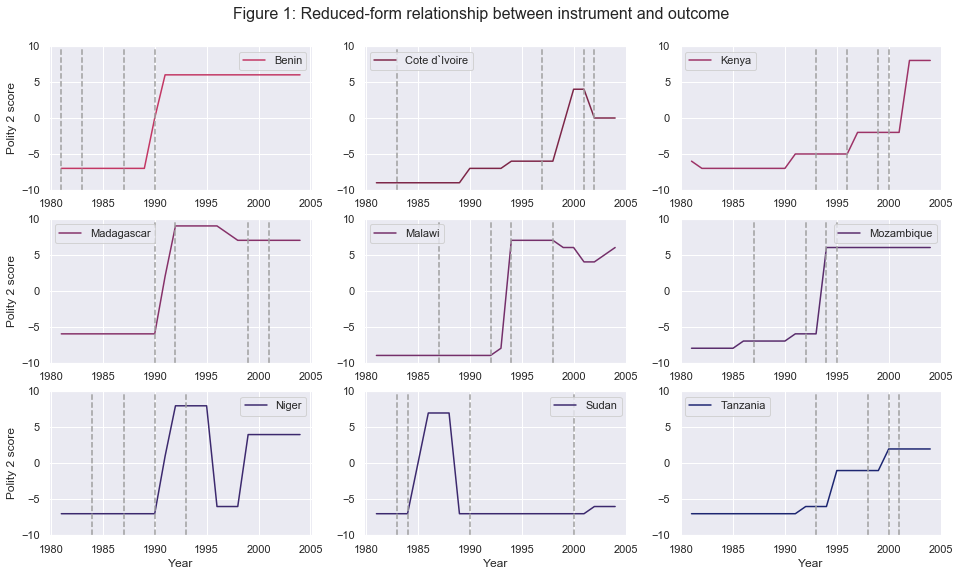

In [5]:
''' Countries presented in paper '''
country_codes = [434, 437, 501, 580, 553, 541, 436, 625, 510]

plot_reduced_form(country_codes, election=False)

In contrast to the reduced-form relationship of $Z$ and $Y$ depicted in *Figure 1*, the sequence of maps below illustrates the chain of mediation ($Z \rightarrow D \rightarrow Y$).

* Left map shows drought in snapshot year
* Center map depicts recession in snapshot year
* Right map reveals change in institutional score from snapshot to subsequent year

*Moving* from the left to the center map is essentially the first stage ($Z \rightarrow D$). A negative shock of the instrument leads to a recession in the same year due to a shortfall in agricultural produce. During these times of crop failure the opportunity cost to contest political power is lowered and the regime in power will deploy more demoratic institutions as a response to protest with a time lag of one year (center to right map), i.e. second stage, or $D \rightarrow Y$.

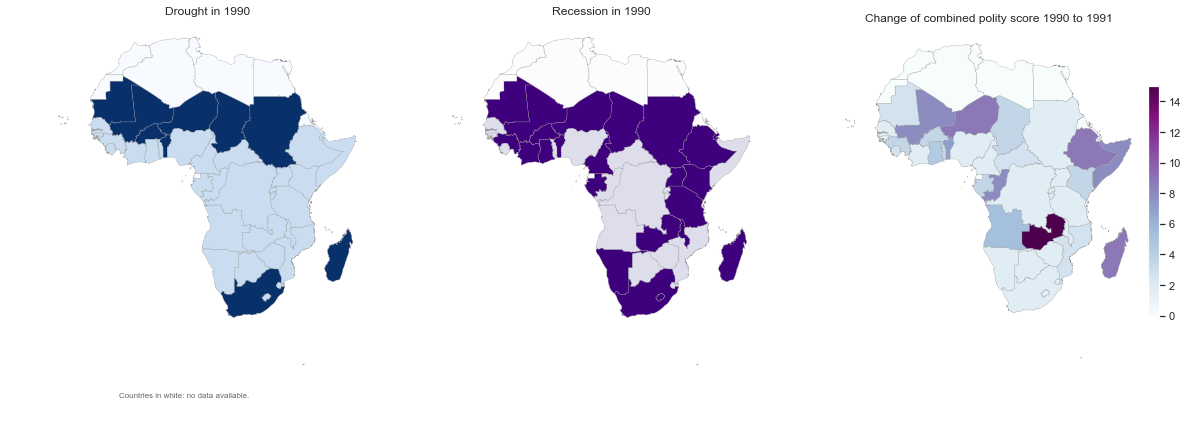

In [6]:
draw_story_map(1991)

Though the above maps are just a snapshot of the time investigated $-$ but a favorable, admittedly $-$ it may tell the reader the underlying story from a different perspective. Going from left to right, one sees that particularly countries with some territory in the Saharan desert suffered a drought in 1990 of which all faced a recession in the same year. The co-movement of recessions in 1990 and positive changes of the Polity score in 1991 is present for many countries. But there are a few prominent examples for which this is not the case $-$ i.e. an improvement in institutions occured without a prior recession or despite an economic downswing polity scores did not increase. With the exception of South Africa and Sudan, in countries whose recessions were triggered exogenously through a drought the polity score improved in the subsequent year.

Note that data in this visualization are very stylized, and are only to motivate the story. In the main analysis, instead of droughts and recessions, rainfall and GDP per capita are considered. Dummies have been chosen over continuous data for reasons of representation and intuition albeit a lot of information is discarded. Recessions are not instrumented. 

Also, for completeness see the maps below indicating that not every point in time is supportive of the story. The ``draw_story_map()`` method is built such that one can go through any year from 1981 to 2004.

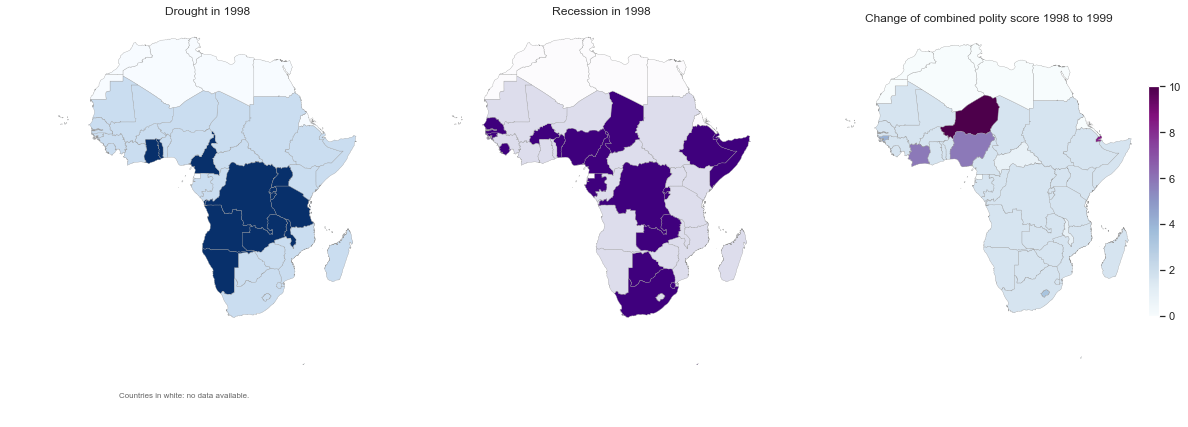

In [7]:
draw_story_map(1999)

<hr />
<br>
<a id='section-ii'></a>

## Section II

Before diving into the estimation framework and results, note the following remarks on the estimations conducted and the results presented. All estimations are done using OLS unless stated otherwise. Standard errors are clustered at the country level and are reported below coefficients in brackets. Coefficients are marked by stars $*$, $**$, $***$ if they are significantly different from zero at the 90, 95 and 99 percent confidence level. P-values are not reported. Note, that for the 2SLS estimation the authors implement a version of the Anderson–Rubin test which is robust to heteroskedasticity and arbitrary within-country correlation of the residuals (see *Footnote 17*). Accordingly, the test's key property is robustness to weak instruments. As the underlying procedure could not be implemented in this replication, p-values differ. The greatest discrepancy arises in the 2SLS estimator's p-value of the causal variable which is 0.066 here and 0.049 in the underlying paper. Interpretation of output is not severely affected.

Since the statsmodels package does not offer a convenient way to collapse fixed effects in the regression output (and for reasons of representation) regression outputs are saved as TeX-files from which fixed effect and country-specific time trend are manually erased. However, in light of reproducability and transparency all functions estimating models and producing regression outputs are called in the Appendix, so as to align with the *credibility revolution*, and also to follow-up on additional statistics reported.

### II.a Estimation Framework

As has been done in the illustration section, the problem's dimension is scaled down to the case of a binary instrument. Hence, attention is first turned to $drought$ and then to $rainfall$ as instrument for GDP per capita to establish intuition of the research design.

For the case of the binary instrument the Wald estimator is put to work. Estimating the causal effect of interest will be done by means of the 2SLS estimator owing to the continuous instrument.

### II.a.1  Wald Estimator

In case of a binary instrument the general univariate IV estimator can be written as

\begin{align*}
\hat{\delta}_{IV, Wald} = \frac{E[Y \mid Z = 1] - E[Y \mid Z = 0]}{E[D \mid Z = 1] - E[D \mid Z = 0]}
\end{align*}
<br>

yielding the famous Wald estimator. Inspecting the potential outcomes as conditional expectations $-$ and aside from conditioning on either state of the instrument, controlling for country and time fixed effects and a country-specific time trend $-$ the covariate-adjusted Wald estimator reads

\begin{align*}
\hat{\delta}_{IV, Wald} = \frac{E[Y \mid \tilde{Z} = 1] - E[Y \mid \tilde{Z} = 0]}{E[D \mid \tilde{Z} = 1] - E[D \mid \tilde{Z} = 0]}
\end{align*}
<br>

where the notation of $\tilde{Z}$ is borrowed from Angrist and Pischke (2009) and reflects the inclusion of controls.

Using $drought$ as the binary instrument the here described Wald estimator is computed by estimating the reduced-form and the first-stage to obtain the numerator and denominator, respectively. Then, the Wald estimator as described above is given by 

\begin{align*}
\hat{\delta}_{IV, Wald} = \frac{\theta}{\gamma}
\end{align*} 

where estimates for $\theta$ and $\gamma$ are introduced in the next paragraph.

#### Reduced Form

The reduced-form specification directly relates the outcome and the instrument. Any effect measured is by assumption attributed to the channel through income. Again, time and country fixed effects plus a country-specific time trend are included. The resulting specification reads

\begin{align*}
\Delta\ polity2_{t, c} = \alpha_{c}\ + \beta_{c}t\ + \phi_{t}\ + \theta\ I(drought_{t-1, c}) + u_{t,c}
\end{align*}
<br>
where $u_{t,c}$ is the error term.

#### First Stage

To isolate the exogenous variation in GDP per capita, the treatment variable is regressed on the instrument which is assumed to not have any relationship with the outcome aside through income. Results of the first-stage give an indication whether the instrument is relevant, i.e. if it causes variation in the treatment.

Including time and country fixed effects plus a country-specific time trend the first stage is depicted by 

\begin{align*}
log(GDP_{t, c}) = \alpha_{c}\ + \beta_{c}t\ + \phi_{t}\ + \gamma\ I(drought_{t, c}) + v_{t,c}
\end{align*}
<br>
where $v_{t,c}$ is the error term.

Both the reduced-form and the first-stage are estimated by means of OLS.

In [8]:
spec_first_stage = 'lgdp_l2 ~ dum_rain_20 + C(ccode) + C(ccode) : I(year) + C(year)'
spec_reduc_form = 'polity_change ~ dum_rain_20 + C(ccode) + C(ccode) : I(year) + C(year)'

rslt_r = smf.ols(formula=spec_reduc_form,data=df).fit(cov_type='cluster',cov_kwds={'groups':df['ccode']})
rslt_f = smf.ols(formula=spec_first_stage,data=df).fit(cov_type='cluster',cov_kwds={'groups':df['ccode']})

wald_estim = rslt_r.params['dum_rain_20']/rslt_f.params['dum_rain_20']
print('\nThe Wald estimator is {:.2f}.\n'.format(wald_estim))


The Wald estimator is -17.61.



That means, a one percent decrease in GDP per capita increases the combined polity score by 0.176 points which corresponds to an increase of 0.088 percentage points given the [-10,10] scale.

### II.a.2 Two-stage Least Squares

Acknowledging that the instrument rainfall is continuous, the Two-stage Least Squares (2SLS) estimation is used to to implement the IV design described. Both the first and second stage are estimated by OLS with country and time fixed effects. Additionally, all specifications include a country-specific time trend, and error terms are mean-zero. Coefficients' standard errors are clustered at the country level to account for potential serial correlation of the error term within countries across time. The data do not allow for clusters underneath the country dimension, and clusters with respect to geographical conditions are not considered. The error term is assumed to be independent across countries.

#### First Stage

To isolate the exogenous variation in GDP per capita, the treatment variable is regressed on the instrument which is assumed to not have any relationship with the outcome aside through income.

Including time and country fixed effects plus a country-specific time trend the first stage is depicted by 

\begin{align*}
log(GDP_{t, c}) = \alpha_{c}\ + \beta_{c}t\ + \phi_{t}\ + \gamma\ log(rainfall_{t, c}) + v_{t,c}
\end{align*}

with results reported in *Table 1*. Whereas in *Table 2* the estimation output for the following specification is presented

\begin{align*}
recession_{t, c} = \alpha_{c}\ + \beta_{c}t\ + \phi_{t}\ + \gamma\ log(rainfall_{t, c}) + v_{t,c}
\end{align*}
<br>
where $v_{t,c}$ is the error term. 

For both base specifications results with additional covariates are presented, namely rainfall lagged by one and or two periods, the combined polity score and an interaction between rainfall and $polity$.

In [9]:
table_first_stage(show=False)

<img src="tables/table_1.png" height=500 width=500 />

<br>

<img src="tables/table_2.png" height=500 width=500 />

<br>

As *Table 1* shows, rainfall affects log GDP per capita positively and contemporaneously and decreases the probability of a recession. Considering further robustness specifications (2)-(4) indicates that only rainfall in the same period significantly explains GDP per capita, with coefficients being relatively stable across models. An increase in rainfall levels by 1% relates to an increase in GDP per capita by around 0.075 to 0.082%. Point estimates are significantly different from zero at the 95 or 99 percent significance level. Contemporaneous rainfall decreases the probability of a recession whereas lagged rainfall, the combined polity score and its interaction with rainfall do not have a significant impact. 

The effect of rainfall on a recession indicator is again only significant for events in the same period. Column (5) informs that a 10% decrease in rainfall increases the probability of a recession in the same period by 3.99% $-$ an effect significantly different from zero with 99% confidence. The point estimate is robust to other specifications, namely (6)-(8).

That rainfall affects outcomes in the same period $t$ motivates the author's choice of (1) and (5) for the first-stage specifications going forward.

Further, rainfall is mean-reverting as indicated by results presented in *Table 9* in the Appendix. This supports the claim that rainfall shocks are non-persistent, and the finding also aligns with the first-stage results where lagged rainfall does not have a significant impact on income in $t$.

#### Second Stage

After *isolating* the clean variation in GDP per income $-$ fitted values of the first stage, indicated by a hat $-$ are included in the second stage regression. Further, time and country fixed effects plus a country-specific time trend are included. The resulting specification with a placeholder $Y$ for varying depended variables reads

\begin{align*}
Y_{t,c} = \alpha_{c}\ + \beta_{c}t\ + \phi_{t}\ + \theta\ \widehat{log(GDP_{t-1, c})} + u_{t,c}
\end{align*}
<br>
where $u_{t,c}$ is the error term.

In [10]:
table_second_stage(show=False)

<img src="tables/table_3.png" height=600 width=600 />

<br>

In *Table 3* the results of the 2SLS estimation are presented. Column (1) reads that a negative transitory income shock of 1 percent leads to an increase in the combined polity score of 0.18 points in the subsequent year. Given the score ranges in [-10, 10] this depicts an increase of 0.9 percentage points. Similarly, a 1 percent negative shock to income causes an increase in the  score's subcomponents by 0.058, 0.077 and 0.061 points for the constraint of executive, political competition and executive recruiting scores, respectively. These point estimates amount to changes of 0.97, 0.85 and 0.88 percentage points given their respective range.

Moreover, a 1 percent negative shock to income increases the probability of a democratic transition by 1.285 percentage points. The estimated coefficient is significantly different from zero at the 95 percent confidence level.

Note that the recovered effect of -18.02 from column (1) is close to the Wald Estimator of -17.61 with the binary instrument $drought$.
<br>
<hr />
<br>

<a id='section-iii'></a>
## Section III

### III.a Context matters

Having had a glance at the first and second stage estimations, attention in this sub-section is focused on heterogeneous results given two sub-samples that are divided along their agricultural sector's size. For this purpose, Panel A refers to countries with an average agricultural GDP share in 1980-2004 below the sample median of 34.7%, and Panel B includes countries above.

As the left of the two subsequent maps shows, the agriculture's GDP share varies substantially across countries. This has consequences for the instrument's validity if sub-samples are considered. While rainfall still can be assumed exogenous, it may not be relevant for countries with a very small agricultural sector $-$ variation in rainfall will not cause much variation in GDP per capita. In other words, for small-agriculture-countries the instrument will unlikely influence treatment. 

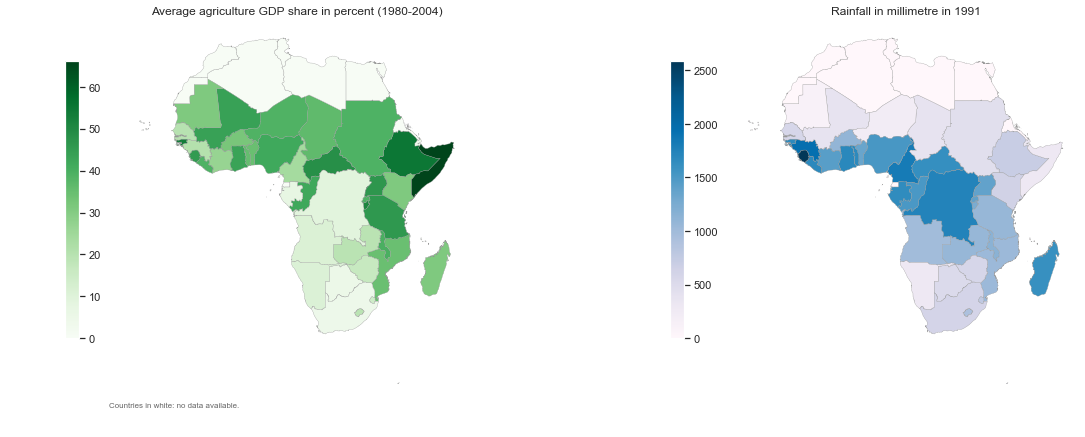

In [11]:
draw_settings_map(plot=1,year=1991)

An important condition:

> The agricultural sector substantially contributes to GDP and provides occupation and income for the global poor

An important condition for the instrument's relvance is that agriculture is an important determinant of GDP. For the research design it further is required that a substantial share of people work in the agricultural sector which are inevitably hit by produce failure due to droughts. This group may be best thought of as day laborers on larger farms, subsistency and small-holder farmers with little opportunity to smooth income flows (e.g. through storage, insurance or wealth liquidation). Since these individuals most likely have little wealth, less exposure to schooling and few outside options, they are vulnerable to income shocks (Fjelde and Uexkull (2012)). It renders also plausible that indivdiuals outside agriculture are adversely affected by income shocks induced by droughts. For instance, the (urban) poor see cuts in their disposable income if food prices increase. In that sense, not only individuals employed in agriculture may become protestors of more democratic institutions. 

As the following results in *Table 4* show, the story becomes more nuanced when considering the sub-samples of countries split by the median of agricultural GDP share.

In [12]:
table_x_basic(show=False)

<img src="tables/table_4.png" height=500 width=500 />

<br>

This table reproduces the main results presented in the article's Table X and reveal that rainfall does not have a significant effect on GDP in countries with an agricultural sector GDP share below the median (Panel A). Note that estimating the reduced-form by means of OLS does not yield a significant relationship between the instrument and the outcome. This is likely due to the weak correlation between the instrument rainfall and the treatment income. While this indicates that the chain of mediation ($Z \rightarrow D \rightarrow Y$) is not "effective", the insignificant relationship of the instrument and the outcome for the sub-sample with small agricultural GDP shares also does not offer a reason to reject the exclusive restriction assumption. Certainly, this is not proving that the exclusion restriction indeed holds true, in fact, this identifying assumption cannot be tested with the data (Morgan and Winship (2007)). However, there would be trouble in identifying the causal effect of interest if the instrument was to affect the outcome without correlating with the treatment.

For Panel B $-$ countries with agricultural GDP shares above the sample median $-$ the coefficient's magnitude and standard errors look differently. In fact, rainfall significantly affects income in the same period at the 5% confidence level, and estimates of the reduced-form relationship indicate that rainfall and the change in institutional scores have a negative relationship, i.e. a negative rainfall shock in year $t-1$ increases the combined polity score in $t$.

In the table below the reduced-form relationship for more sub-samples is explored that are split into quartiles of agricultural GDP share (average over the sample's time horizon). Trading-off number of observations in each group and granularity of heterogeneous reduced-from effects for different groups of countries it does not seem to be wise to further increase the number of groups beyond four. Panels I, II, III and IV pool countries in the first, second, third and fourth quartile of the agricultural GDP share distribution. 

In [13]:
table_x_extension(show=False)

<img src="tables/table_5.png" height=900 width=900 />

<br>

*Table 5* informs that the higher the agricultural GDP share the stronger the link between rainfall and GDP per capita (consult columns (1), (4), (7) and (10)). For countries in Panels I and II no significant effect of rainfall on GDP is reported whereas for Panel III and IV the effects are significant at 90 percent and 99 percent confidence, respectively. Since both rainfall and GDP per capita enter the specification in logarithmic terms their relationship can be directly interpreted as an elasticity. For Panel IV countries an increase in rainfall of 1 percent leads to an increase in GDP per capita by 0.271 percent. 

While for all sub-samples a negative reduced-form relationship is estimated it is only significant for the set of countries in the third quartile. In Panel III, a temporary reduction in lagged rainfall levels by 1 percent is associated with an increase in the combined polity score by 0.070 points or 0.035 percentage points. A decline in rainfall levels by 10 percent increases the probability of a democratic transition by 3.9 percentage points.

It seems that the variation in institutional scores induced by rainfall shocks and its transmission through the agricultural sector and GDP per capita is not the entire story. Certainly, the creation of four subsamples cuts down the numbers of observations and severe rainfall incidents which may lead to small sample bias but it may be that some important factors are missing. For instance, socities with a large agricultural sector tend to be poorer (e.g. Kuznets (1973) or Laitner (2000)) and as indicated by the sample correlation of -0.691 between agricultural GDP share and log income per capita. Accordingly, Panel I countries constitute the richest and Panel IV the poorest countries in the sample. Thus, the chain of mediation seems to only be *active* for low to medium income countries while there is not such an effect for very poor and medium to high income countries (Panel IV and Panels II and I, respectively). The notion of low, medium and high income countries refers to the sample as from a global perspective most countries in the sample are low income countries. It already has been established that higher income countries have a smaller agricultural sector and the first-stage relationship between rainfall and GDP per capita is not as pronounced for them. This explains why for Panel I and II countries no stark results are found. Though, it is still puzzling why poor countries with a large agricultural sector (and a significant first-stage) do not exhibit a significant reduced-form relationship. For Panel IV countries the link between protests and insititutional improvements seems to fail, and/or there exist barriers to contest power even in times when opportunity cost of protesting is reduced. Perhaps, a farming population cannot afford to protest in times of droughts as they are constrained to focus attention on food and income provision. Or, very poor countries have less developed infrastructure and fewer means of transportation and communication to organize effective protests. There are likely other factors that can shed some light on this issue but are out of scope of this analyis.

In [14]:
print(df[['agri_gdpshare', 'lgdp']].corr())

               agri_gdpshare      lgdp
agri_gdpshare       1.000000 -0.690526
lgdp               -0.690526  1.000000


What do these different results for Panel A and Panel B countries, and particular for the four sub-sample results, mean for the instrument's relevance? While the instrument seems to be weak for countries with low agricultural GDP shares, the reverse holds for countries in the third and fourth quartile. Recalling the full sample first-stage estimation reminds that rainfall is highly relevant in explaining GDP per capita movements. So, this *debate* shall not focus on the partial weak correlation between $Z$ and $D$ in certain subsamples but rather the interpretability of the full sample 2SLS results is discussed in the next paragaph.

### III.b (Re-)Interpretation of Results

**The Local Average Treatment Effect** 

What came up in the previous discussion about the instrument affecting the treatment and the causal link to the outcome can be related to the concept of the *Local Average Treatment Effect* (LATE) developed by Imbens and Angrist (1994). The LATE offers a more precise concept to understand what $-$ or, in fact, *who* $-$ drives the 2SLS estimation results, and for whom the causal effect is informative.

As indicated by the preceding analysis the causal effect identified by this design is not informative for the entire set of countries, but rather for countries whose medium to large agricultural sector left incomes vulnerable to rainfall shocks (however, not for countries with very high agricultural GDP shares). These *compliers* are the set of countries that underwent treatment only due to the instrument's "push" into treatment, i.e. countries that witnessed an economic downturn in response to a negative rainfall shock. For the so-called *always-takers* who receive treatment in cases where the instrument does and does not influence treatment the LATE is uninformative. Therefore, the average treatment effect on the treated (ATT) is different to the LATE since for the former both compliers and always-takers are considered. One can show that the ATT is a weighted-average of treatment effects of both compliers and always-takers, see Angrist and Pischke (2009). 

To recover the LATE a monotonicity assumption is required in addition to the exogeneity, relevance and exclusive restriction assumptions described above. Monotonicity means in principle that the instrument's effect on the treatment variable must be either positive or negative for all units. In particular this does not allow the presence of *defiers* $-$ units that would receive treatment in the counterfactual state of an inactive instrument but do not if they are "pushed" intro treatment by the instrument. Here, this would be the case if countries which would have been falling into a recession do not do so in response to a drought. A potential case for defiant behavior is given if a country is to avoid a recession when a drought occurs because as a response to the drought the government engages in expansionary fiscal policy which averts the recession. Now consider the second group not receiving treatment: *never-takers* refer to objects not receiving treatment regardless of the instrument's value. Mapping this group to the underlying study, countries with a neglectable agricultural share can be considered never-takers as they do not respond to rainfall shocks with a recession $-$ by definition, the LATE cannot be informative for this group.

**The Average Causal Response** $-$ *Generalizing the LATE*

Since for the main analysis GDP per capita as a continuous variable is used as treatment the treatment intensity varies. This means, a similar-sized sudden and temporary decline in income does not have the same effect on institutional scores for different levels of initial income. The single coefficient reported in a linear causal model may lead the reader to believe that the treatment effect is constant for every initial level of income. However, Angrist and Imbens (1995) show that the 2SLS estimator is a weighted average of all unit causal responses, where the unit causal response is the average difference in potential outcomes of compliers at a given level of the treatment. In other words, the average effect on the outcome of countries moving from a certain intensity of treatment "to a bit more" due to the instrument's influence is the unit causal response. Averaging over the range of treatment intensity while weighting by the share of compliers along it, gives the *Average Causal Response* (ACR). As noted by Angrist and Pischke (2009) the idea of the ACR extends to continuous treatment, as is the case here. The 2SLS estimator obtained from regressing the change in the combined polity score on instrumented income (and controlling for time and country fixed effects) is the ACR, driven by compliant countries that are subject to variable treatment intensity.

As noted, the ACR involves weighting by the share of compliers along the range of treatment intensity. Accordingly, the weighting function allows to learn who drives the estimated causal effect. Following Angrist and Imbens (1995), one can consistently estimate the weighting function by computing the difference in cumulated density functions of the treatment variable with the instrument turned on and off. Hence, the weighting function can be interpreted as the difference in probabilities that treatment intensity is at or below a given level conditional on the instrument kicking in or not. By monotonicity, this can only be positive as it is assumed that the effect of the instrument on treatment can either be positive or negative but never both. The ACR weighting function for the binary instrument $drought$ is depicted in *Figure 2* and yields for a given level of treatment intensity the relative share of compliers (Angrist and Pischke (2009)).

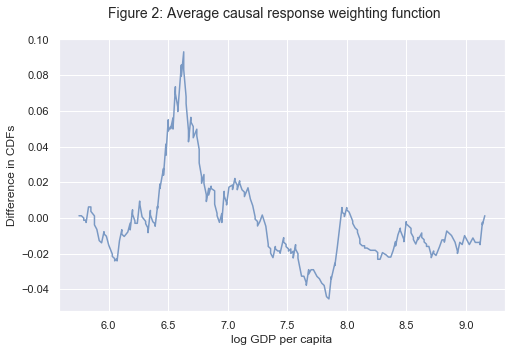

In [15]:
plot_acr_weighting_fct('lgdp_l2')

The relative size of compliant countries is largest for low to medium income countries (relative to the sample as most countries in the sample are low income countries, globally speaking). In other words, a negative rainfall shock affects GDP mostly for countries with a log per-capita income of around 6.2 to 7.3. Note that this is consistent with the evidence presented in *Table 5* where it is shown that the group of countries with a medium to high agricultural GDP share (Panel III) are driving the ACR. As claimed, these are the low to medium income countries which is also indicated by the ACR weighting function which depicts that most action indeed comes from this group of countries.

Recall that by monotonicity the effect of a drought either affects income positively or negatively. However, for countries in the range of 6.2 to 7.3 log GDP per capita the relative share of compliers is positive while it is negative between 7.3 and 9.2. Consider *Figure 3* plotting the treatment intensity's CDFs conditional on the instrument's realization of 1 or 0 $-$ note that the ACR weighting function presented above is the difference between the CDFs. Under monotononicity it is required that the entire CDF of the treatment variable conditional on an *active* instrument is shifted to the left since a drought causes incomes to move to a lower income distribution. However, this is not true for the entire range of treatment intensity. The issue can be understood as follows, for a given probability of, say 0.85, treatment intensity (i.e. income) is higher if a drought occurs compared to if it does not. The monotonicity assumption is violated.

A candidate for speculation is again the differences in agricultural GDP shares since those are negatively correlated with income as argued above. For higher income countries $-$ again relative to sample $-$ agriculture is a smaller determinant of GDP per capita, and hence, rainfall shocks are affecting less people and are less severely transmitted to overall incomes. While this can explain what is driving the treatment effect, it remains unclear how the *negative relative size of compliers* comes about. Following this argument one would expect values of the ACR weighting funciton near zero for high treatment intensities, but not negative ones.

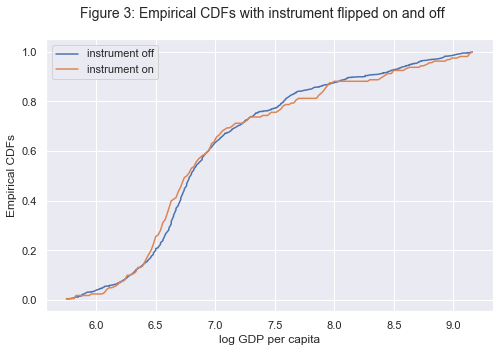

In [16]:
plot_ecdfs('lgdp_l2')

<hr />
<br>
<a id='section-iv'></a>

## Section IV

### IV.a Shedding Light on Mechanism

After discussing the interpretability of the recovered 2SLS estimator and the countries driving the ACR in the last section, attention is now turned to the mechanism linking transitory income shocks and institutional development.

How do non-persistent negative income shocks result in improvements of democratic institutions? The authors argue that a temporary reduction in income decreases the opportunity cost to contest political power which opens a *window of opportunity* in which institutional scores can improve. However, the precise mechanism how these changes come about is not thoroughly described. Shedding light on the mechanism addresses this short-coming, as the author's do not offer an explanation why the regime in power should respond to citizens' political preferences revealed in protests. This point may be more pronounced for those regimes investigated which are autocratic given they have less political competition which in principle would allow for fast changes in voting shares. Following Polity IV's definition of autocracies (a combined polity score of -10 to -6), the share of autocracies in the sample is 77.5 percent in 1981; see also the *settings map* below where scores of sub-Saharan African countries at the beginning of the panel's first period is presented. A lighter color indicates less democratic regimes.

While the authors rule out that democratic change is triggered by a coup d'état it remains unclear whether the political regime reacts to protests by passing laws, renewing the executive or other measures. A question arises: does the current executive change policy for the better after protests within the current institutional framework, or do elections need to fast-forward the way of institutional improvement?

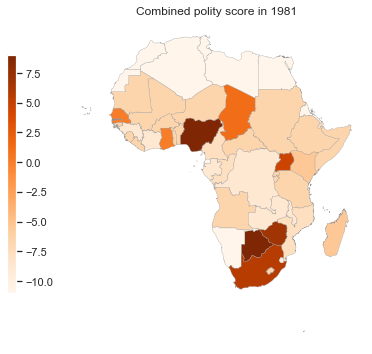

In [17]:
draw_settings_map(plot=2,year=1981)

In [18]:
polity2 = df.loc[df['year']==1981, 'polity2'].values
autoc_share = (polity2 < -5).sum()/(len(polity2))
print('\nThe share of autocratic regimes in the sample in 1981 equals {:} percent.\n'.format(100*autoc_share))


The share of autocratic regimes in the sample in 1981 equals 77.5 percent.



#### The Role of Elections

General elections of the state's representatives and the executive are major political events that can change the political equilibrium of represented interests. The opposition generally has an interest to convince voters to bring a breath of fresh air into politics and address people's preferences not served by the regime. In response to a shift in preferences not addressed by the policy of the regime in power, the latter may be incentiviced to adopt policies of newly formulated demands so to not lose legitamicy or the people's goodwill. To pin down this idea, consider this placative example: think of sub-Saharan farmers to protest for more constraints on the executive as they fear that their agricultural land will be sold to the regime's good friends. They would not have protested if it was not during a drought since their costs to protest are low when income opportunites on the field are low. As the agricultural sector's GDP share is large, many work in agriculture and feel the same way. The opposition has an incentive to win over the farmers and pledge to change the constitution in favor of a more balanced executive. On the other hand, the regime in power may fear to be voted of out office $-$ or in a more autocratic setting: to face riots and disobedience $-$ and promises to constrain the chief executive. While the government's worry may exist for all protests, it seems reasonable to believe that the actual risk to lose power is larger during times of elections. Also, the opposition $-$ if there is any $-$ may gain more ground for their matters in times of election.

A critical note on elections: 
* Elections are not randomly drawn from a certain distribution but follow a pre-determined rule or are re-scheduled due to government failure. Moreover, large protests may cause premature elections if protestors attest a complete failure of the executive. Perhaps, the decision to protest in fact depends on whether there is an election or not, as the expected impact of protesting is larger shortly before an election when the threat to deselection is still credible. If one considers protests to be the country's treatment in times of reduced opportunity cost, then there may be selection into treatment based on an election held in that year. While this is not a threat to the validity of the 2SLS estimator, it offers more insight into the mechanism of how institutional change is triggered.
* An assumption made: it is ruled out that having an election is already an improvement in itself. That is, if a country never had elections, and suddenly introduces them, the combined polity score in the year of the first vote will improve due to the introduction of elections. Then, the improvement in polity scores cannot come through the election channel, and protests will directly improve polity scores in the first year of votings $-$ i.e. having a primal election is part of the outcome. However, since most countries have had votes (with varying degree of freedom and political competition) over the time investigated no attention to this issue beyond this note is provided.
<br>

In [19]:
print("\nIn the sample {:} elections were held.\n".format(len(df[df['election']==1])))


In the sample 142 elections were held.



**Elections** $-$ yet another mechanism

How do (some) people in sub-Saharan Africa react to non-persistent negative income shocks? The author's idea is that individuals hit by a negative shock to income see their opportunity cost to protest decrease and contest power by protesting. During elections contesting power may be even more worth undertaking assuming that protests have a larger effect shortly before voting. However, a low-cost alternative or complement to protesting in times of election is simply to vote. 

The importance of elections as a signal of dissatisfaction with the regime in power can be strong. While for democracies this seems intuitive, the case for autocracies may not be as alternative political choices are at least limited. Nevertheless, there is some evidence that autocratic elections have an effect on policy-making, e.g. Miller (2015) finds that "falling vote totals for the ruling party predict policy concessions following the elections" for a sample of 86 autocratic countries from 1975 to 2004. However, policies rather lead to less military and more social welfare spending, which are not linked to the polity scores.

Due to the nature of political decision-making and the annual data one cannot precisely pin-down the timing of institutional development. It is therefore not possible in this setting to attribute the observed changes in institutional scores to the effect of protests before elections or political responses in the aftermath of them. The underlying paper supports the former while Miller (2015) argues in favor of the latter.

Leaving these considerations behind, the following section will embed elections as a mechanism through which the treatment affects the outcome, and yields a strong case favoring the pivotal role of elections.

**Causal Graph** $-$ The case with elections

Updating the research design requires a revised causal graph. The chain of mediation is extended to exhibit another node $E$ representing an election dummy and is given by ($Z \rightarrow D \rightarrow E \rightarrow Y$). During treatment opportunity cost of contesting power declines but the resulting protests are only able to cause institutional improvements when there is an election in the same year, see *Graph 5*:


*Graph 5*
<img src="graphs/causal_graph_5.png" height=500 width=500 />

<br>

Additionally, allowing for a direct effect of the treatment on the outcome and an indirect effect through elections results in the revised graph below:

*Graph 6*
<img src="graphs/causal_graph_6.png" height=400 width=400 />

<br>

### IV.b Estimation Framework

$-$ the case with elections
<br>
<br>

Following the specification as described above, the first stage estimation is unaffected, and given by

\begin{align*}
log(GDP_{t, c}) = \alpha_{c}\ + \beta_{c}t\ + \phi_{t}\ + \gamma\ log(rainfall_{t, c}) + v_{t,c}
\end{align*}
<br>
where $v_{t,c}$ is the error term.

The second stage's specification is similar to the above case but the instrumented treatment is now additionally interacted with an election dummy $I(election_{t,c})$. Further, the election dummy enters the specification itself:

\begin{align*}
\Delta\ polity2_{t, c} = \alpha_{c}\ + \beta_{c}t\ + \phi_{t}\ + \lambda\ \widehat{log(GDP_{t-1, c})} + \theta\ \widehat{log(GDP_{t-1, c})}*I(election_{t,c}) + \zeta\ I(election_{t,c}) + e_{t,c}
\end{align*}
<br>
where $e_{t,c}$ is the error term.

Results are given in *Table 6*. For comparison, the author's replicated second stage results are shown in column (1) of *Table 6*, and in (2) results without the interaction term are presented. As before, the model is estimated for each of the combined polity score's three sub-components $-$ results are shown in *Table 7*. The respective specification with a placeholder $Y$ for different depended variables reads

\begin{align*}
\Delta\ Y_{t, c} = \alpha_{c}\ + \beta_{c}t\ + \phi_{t}\ + \lambda\ \widehat{log(GDP_{t-1, c})} + \theta\ \widehat{log(GDP_{t-1, c})}*I(election_{t,c}) + \zeta\ I(election_{t,c}) + e_{t,c}
\end{align*}
<br>
where $e_{t,c}$ is the error term.

In [20]:
table_elections(show=False)

<img src="tables/table_6.png" height=400 width=400 />

<br>

In *Table 6* 2SLS results for the updated research design are presented in comparison to the author's specification in column (1). The effect of transitory income shocks on changes in the combined polity score remains significant at the 90 percent confidence level and is slightly reduced in absolute value when introducing an election dummy in (2) and additionaly an interaction between elections in $t$ and log GDP per capita in $t-1$, see (3). Column (2) shows that the effect of an election has a highly significant impact on the outcome. Accordingly, an election increases the combined polity score by 1.35 points or 6.75 percentage points. The effect of a 1 percent decline in income induced by a rainfall shock leads to an increase in the outcome by 0.170 points and is slighty smaller in absolute value compared to its counterpart of 0.180 in the specification without an electoral dummy. Introducing an interaction term in (3), a transitory negative income shock of 1 percent increases the polity score in the subsequent period by 0.178 points and by an additional 0.0084 points during a year of election. The effect of an election in (3) is by no means directly comparable to the estimated coefficient of the elections dummy in (2) given in (3) its interactive effect with instrumented income must be taken into account. 

Investigating the effect of the causal variable on the institutional score's subcomponents and the democratic transition dummy as presented in *Table 7* yields a similar interpretation as above. Namely, transitory negative shocks to income increase subscores in subsequent periods, and they do so more sharply if the elections are in the same year of institutional change (and subsequent to the income shock). Given thaat the mean of instrumented log GDP per capita is 7.02, flipping on the elections dummy increases institutional scores on average $-$ i.e. elections tend to have a positive impact on institutional change. The same pattern applies to the probability of a democratic transition.
<br>
<br>

<img src="tables/table_7.png" height=550 width=550 />

<br>

Note that the research design is not able to provide sophisticated answers for causally explaining government or military expenditure, and the results should be regarded with even greater carefulness. They can be found in *Table 8* in the Appendix. Attesting some usefulness to the results, they do not give a reason to believe that countries with temporarily reduced GDP per income (induced by exogenous variation in rainfall) respond with increased military or government expenditure. The ACR for government expenditure is negative $-$ indicating that in times of economic stress fiscal policy is rather lose $-$ but not significant at any reasonable confidence level.

In [21]:
table_mil_gov(show=False)

<hr />
<br>
<a id='section-v'></a>

## Section V: Concluding Remarks

<br>
<br>
<br>
<br>
<br>

<hr />

### References

Barro, R. (1999). Determinants of Democracy. Journal of Political Economy, 107(6), pt. 2.

Boix, C., and S. Stokes (2003). Endogenous Democratization. World Politics, 55, pp. 517–549.

Brückner, M., A. Ciccone, A. Tesei (2012). Oil Price Shocks, Income, and Democracy. The Review of Economics and Statistics, 94(2), pp. 389-399.

Ciccone, A. (2013). Estimating the Effect of Transitory Economic Shocks on Civil Conflict. Review of Economics and Institutions, 4(2), pp. 1-14.

Fjelde, H., N. von Uexkull (2012). Climate triggers: rainfall anomalies, vulnerability and communal conflict in sub-Saharan Africa. Political Geography, 31(7), pp. 444-453.

IDEA (International Institute for Democracy and Electoral Assistance), [link to data](https://www.idea.int/data-tools/continent-view/Africa/40), accessed: 02-June-2019

Kuznets, S. (1973). Modern Economic Growth: Findings and Reflections. The American Economic Review, 63(3), pp. 247-258. 

Laitner, J. (2000). Structural Change and Economic Growth. The Review of Economic Studies, 67(3), pp. 545–561.

Imbens, G. and J. Angrist (1994). Identification and Estimation of Local Average Treatment Effects. Econometrica, 62(2), pp. 467-475. 

Morgan, S. L. and C. Winship (2007). Counterfactuals and Causal Inference: Methods and Principles for Social Research. Cambridge: Cambridge University Press (Analytical Methods for Social Research).

Przeworski, A. and F. Limongi (1997). Modernization: Theories and Facts. World Politics, 49, pp. 155-183.

Rosenzweig, M. and K. Wolpin (2000). Natural "Natural Experiments" in Economics. Journal of Economic Literature, 38(4), pp. 827-874.

Verbeek, M. (2008). A guide to modern econometrics. Chichester, England: John Wiley & Sons.

<br>
<hr />
<br>

<a id='appendix'></a>
## Appendix



<img src="tables/table_8.png" height=500 width=500 />

<br>

*Table 9* shows results of estimating log rainfall in $t$ on log rainfall in $t-1$ while controlling for country fixed effects (1) and additionally allowing for a country-specific time trend (2). The specifications rely on work by Ciccone (2013). Following Verbeek (2008), the investigated time series is mean-reverting as indicated by the point estimate being "close" to zero, i.e. rainfall does not persistently depend on past levels and shocks to rainfall die out quickly over time. Formally, testing for mean reversion based on a Dickey-Fuller test is required, which is not discussed here.

In [22]:
table_mean_revert(show=False)

<img src="tables/table_9.png" height=350 width=350 />

<br>

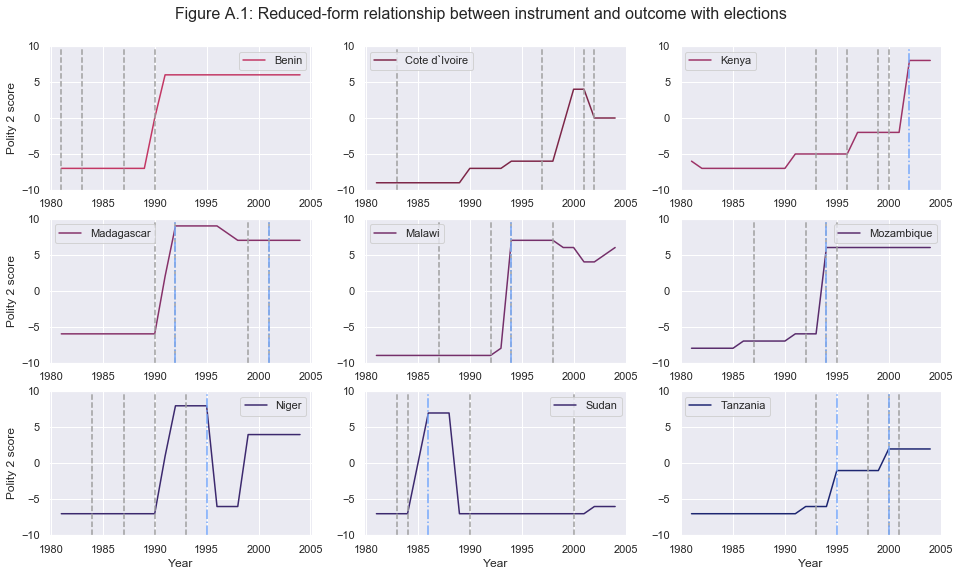

In [23]:
''' Countries presented in paper '''
country_codes = [434, 437, 501, 580, 553, 541, 436, 625, 510]

plot_reduced_form(country_codes, election=True)

*Figure A.1* depicts the evolution of the combined polity score in selected sub-Saharan African countries over time. Grey dashed lines indicate droughts, while dashed blue lines depict elections.

<hr />
<br>

*Below, all regression outputs are reproduced for reasons of transparency.*
<br>

**Table 1 and 2**

In [24]:
table_first_stage(show=True)


                          (1)         (2)         (3)         (4)    
---------------------------------------------------------------------
lgpcp_l2              0.079**     0.075***    0.076***    0.082**    
                      (0.031)     (0.028)     (0.029)     (0.032)    
lgpcp_l3                          0.048       0.046                  
                                  (0.035)     (0.031)                
lgpcp_l4                                      0.010                  
                                              (0.038)                
polity2l2                                                 -0.002     
                                                          (0.022)    
lgpcp_l2_polity2l2                                        0.001      
                                                          (0.003)    
C(ccode)[404]:I(year) 0.003***    0.003***    0.003***    0.003***   
                      (0.000)     (0.000)     (0.000)     (0.000)    
C(ccode)[420]:I(yea

**Table 3**

In [25]:
table_second_stage(show=True)


                          (1)         (2)        (3)         (4)         (5)    
--------------------------------------------------------------------------------
lgdp_l_hat            -18.021*    -5.809*     -7.680*    -6.137*     -1.285**   
                      (9.810)     (3.491)     (3.973)    (3.425)     (0.635)    
C(ccode)[404]:I(year) 0.054*      0.017*      0.023*     0.018*      0.004**    
                      (0.029)     (0.010)     (0.012)    (0.010)     (0.002)    
C(ccode)[420]:I(year) 0.062***    0.027**     -0.004     0.019       -0.066***  
                      (0.019)     (0.012)     (0.014)    (0.012)     (0.020)    
C(ccode)[432]:I(year) 0.368*      0.127*      0.117      0.126*      0.036***   
                      (0.192)     (0.074)     (0.084)    (0.073)     (0.009)    
C(ccode)[433]:I(year) 0.095***    0.042***    -0.082***  0.087***    -0.010***  
                      (0.008)     (0.008)     (0.010)    (0.009)     (0.002)    
C(ccode)[434]:I(year) 0.210

**Table 4**

In [26]:
table_x_basic(show=True)


                          (1)         (2)         (3)        (4)         (5)        (6)    
-------------------------------------------------------------------------------------------
lgpcp_l                           0.240       -0.010                 0.519       0.070     
                                  (0.419)     (0.044)                (0.755)     (0.079)   
lgpcp_l2              0.031       -0.885      -0.083      0.130***   -2.773*     -0.207**  
                      (0.035)     (0.810)     (0.096)     (0.050)    (1.576)     (0.102)   
lgpcp_l3              0.003                               0.088                            
                      (0.040)                             (0.062)                          
C(ccode)[404]:I(year)                                     0.002***   0.008       0.001     
                                                          (0.000)    (0.006)     (0.000)   
C(ccode)[420]:I(year) 0.003***    0.002       0.000                            

**Table 5**

In [27]:
table_x_extension(show=True)


                          (1)         (2)        (3)        (4)         (5)         (6)    
-------------------------------------------------------------------------------------------
lgpcp_l                           0.396       -0.034                1.197       0.089      
                                  (0.383)     (0.058)               (0.972)     (0.096)    
lgpcp_l2              0.024       -0.161      0.012      0.030      -1.617      -0.208     
                      (0.066)     (0.671)     (0.082)    (0.064)    (1.774)     (0.132)    
lgpcp_l3              -0.005                             0.033                             
                      (0.067)                            (0.036)                           
C(ccode)[420]:I(year)                                    0.003***   0.001       0.001      
                                                         (0.000)    (0.007)     (0.000)    
C(ccode)[433]:I(year)                                    0.002***   0.054***   

**Table 6 and 7**

In [28]:
table_elections(show=True)


                          (1)         (2)         (3)    
---------------------------------------------------------
lgdp_l_hat            -18.021*    -16.967*    -17.779*   
                      (9.810)     (9.892)     (9.708)    
lgdp_l_hat_elect                              -0.840**   
                                              (0.358)    
election                          1.347***    7.355***   
                                  (0.312)     (2.807)    
C(ccode)[404]:I(year) 0.054*      0.051*      0.053*     
                      (0.029)     (0.029)     (0.029)    
C(ccode)[420]:I(year) 0.062***    0.072***    0.086***   
                      (0.019)     (0.019)     (0.020)    
C(ccode)[432]:I(year) 0.368*      0.354*      0.377**    
                      (0.192)     (0.193)     (0.189)    
C(ccode)[433]:I(year) 0.095***    0.104***    0.119***   
                      (0.008)     (0.008)     (0.011)    
C(ccode)[434]:I(year) 0.210*      0.186*      0.202*     
             

**Table 8**

In [29]:
table_mil_gov(show=True)


                         (1)       (2)        (3)         (4)    
-----------------------------------------------------------------
lgdp_l_hat            -0.767    -0.720    -0.809      -0.854     
                      (0.660)   (0.670)   (1.191)     (1.213)    
lgdp_l_hat_elect                0.007                 -0.017     
                                (0.016)               (0.046)    
election                        -0.020                0.107      
                                (0.125)               (0.331)    
C(ccode)[404]:I(year) 0.002     0.002     0.003       0.003      
                      (0.002)   (0.002)   (0.004)     (0.004)    
C(ccode)[420]:I(year) -0.007*** -0.007*** 0.012       0.013      
                      (0.001)   (0.002)   (0.011)     (0.011)    
C(ccode)[432]:I(year) 0.010     0.009     0.047       0.048      
                      (0.013)   (0.013)   (0.030)     (0.031)    
C(ccode)[433]:I(year) -0.002*** -0.002*** 0.026**     0.027**    
         

**Table 9**

In [30]:
table_mean_revert(show=True)


                         (1)       (2)    
------------------------------------------
lgpcp_l2              0.217***  0.112**   
                      (0.051)   (0.045)   
C(ccode)[404]:I(year)           0.009***  
                                (0.001)   
C(ccode)[420]:I(year)           0.005***  
                                (0.000)   
C(ccode)[432]:I(year)           0.005***  
                                (0.000)   
C(ccode)[433]:I(year)           0.004***  
                                (0.000)   
C(ccode)[434]:I(year)           0.006***  
                                (0.000)   
C(ccode)[435]:I(year)           0.002***  
                                (0.000)   
C(ccode)[436]:I(year)           -0.000    
                                (0.000)   
C(ccode)[437]:I(year)           -0.007*** 
                                (0.000)   
C(ccode)[438]:I(year)           -0.005*** 
                                (0.000)   
C(ccode)[439]:I(year)           0.008***  
          

$-$ End of notebook.

<hr />